In [1]:
from functions import *
from PointNet import PointNet
from PointCNN import PointCNN

torch.manual_seed(12456789)
np.random.seed(12456789)

I0000 00:00:1711999723.289407       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M3 Max
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
I0000 00:00:1711999723.321096       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M3 Max


In [2]:
# Refer to functions.py if you want to merge multiple datasets

dataset1 = "./combined_asl_alphabet/Train_Alphabet"
# dataset2 = "./asl_dataset"
# dataset3 = "./extras"
destination_path1 = "./landmarks_1"
# destination_path2 = "./landmarks_2"
# destination_path3 = "./landmarks_3"

# CREATING DATASET
# Uncomment if necessary
# create_dataset(dataset1,destination_path1, transform)


# Additional creation
# create_dataset(dataset2,destination_path2, transform)
# create_dataset(dataset3,destination_path3, transform)


In [3]:
# merge_folders(destination_path2, destination_path1)
# merge_folders(destination_path3, destination_path1)

In [4]:
items = load_dataset(destination_path1)

training, validation = random_split(items, [0.9, 0.1])
training_input_tensor = torch.Tensor([x[0] for x in training])
training_output_tensor = torch.LongTensor([int(x[1]) for x in training],device=device).long()
validation_input_tensor = torch.Tensor([x[0] for x in validation])
validation_output_tensor = torch.Tensor([int(x[1]) for x in validation], device=device).long()

/var/folders/3y/j1sjc53s5kd68c_jg7jw90pr0000gn/T/ipykernel_15807/2308339370.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  training_input_tensor = torch.Tensor([x[0] for x in training])


In [5]:
print("Training: ", training_input_tensor.shape, training_output_tensor.shape)
print("Validation: ", validation_input_tensor.shape, validation_output_tensor.shape)

Training:  torch.Size([43978, 21, 3]) torch.Size([43978])
Validation:  torch.Size([4886, 21, 3]) torch.Size([4886])


In [6]:
batch_size = 128
epochs = 10

print(len(char2int))
tensor_train_dataset = TensorDataset(training_input_tensor,training_output_tensor) 
train_dataloader = DataLoader(tensor_train_dataset, batch_size = batch_size, shuffle = True)
tensor_val_dataset = TensorDataset(validation_input_tensor,validation_output_tensor)
val_dataloader = DataLoader(tensor_val_dataset, batch_size = batch_size, shuffle = True)
model1 = PointNet(len(char2int)).to(device)
model2 = PointCNN(len(char2int)).to(device)

29


Model 1

In [7]:
loss_train_all1, acc_train_all1, loss_val_all1, acc_val_all1 = train_model(model1,epochs,train_dataloader,val_dataloader,"PointNet-LR0.0001",learn_rate=0.0001)

Current epoch:0
Acc train: 0.8811668909566347, Loss train: 0.8317665710265554, Acc val: 0.9631774471356318, Loss val: 0.2644093850484261,
Current epoch:1
Acc train: 0.9732528677166894, Loss train: 0.18586903682714978, Acc val: 0.9761618589743589, Loss val: 0.13947737331573778,
Current epoch:2
Acc train: 0.9820873517283174, Loss train: 0.10515840364576773, Acc val: 0.9798404727226648, Loss val: 0.110973365795918,
Current epoch:3
Acc train: 0.9868915973361149, Loss train: 0.07110819325587431, Acc val: 0.9823717948717948, Loss val: 0.08351695623535377,
Current epoch:4
Acc train: 0.9906265959143639, Loss train: 0.05289064136572009, Acc val: 0.980805652263837, Loss val: 0.0793943998332207,
Current epoch:5
Acc train: 0.9931990493868672, Loss train: 0.03905701493779414, Acc val: 0.9853766025641025, Loss val: 0.06799529378230755,
Current epoch:6
Acc train: 0.9945267078488372, Loss train: 0.03000999500888378, Acc val: 0.9859775641025641, Loss val: 0.05778356486310562,
Current epoch:7
Acc train:

Model 2

In [8]:
loss_train_all2, acc_train_all2, loss_val_all2, acc_val_all2 = train_model(model1,epochs,train_dataloader,val_dataloader,"PointNet-LR0.00001",learn_rate=0.00001)

Current epoch:0
Acc train: 0.9992278343023255, Loss train: 0.007503706293835759, Acc val: 0.9895833333333334, Loss val: 0.04366407778639442,
Current epoch:1
Acc train: 0.9997501816860465, Loss train: 0.0051506574124877535, Acc val: 0.9884178317510165, Loss val: 0.04670767607286763,
Current epoch:2
Acc train: 0.9997563197515732, Loss train: 0.004431918163602457, Acc val: 0.9893830128205128, Loss val: 0.043069776971466266,
Current epoch:3
Acc train: 0.9997501816860465, Loss train: 0.004119392109460869, Acc val: 0.9891826923076923, Loss val: 0.04211183813943838,
Current epoch:4
Acc train: 0.9998183139534884, Loss train: 0.0035451383175609938, Acc val: 0.9891826923076923, Loss val: 0.04276463248205777,
Current epoch:5
Acc train: 0.999824452019015, Loss train: 0.003327250008560652, Acc val: 0.9895833333333334, Loss val: 0.04277544448343225,
Current epoch:6
Acc train: 0.9998637354651163, Loss train: 0.0030350660929607965, Acc val: 0.9888184727766575, Loss val: 0.04317190681393139,
Current ep

Model 3

In [9]:
loss_train_all3, acc_train_all3, loss_val_all3, acc_val_all3 = train_model(model2,epochs,train_dataloader,val_dataloader,"PointCNN-LR0.001",learn_rate=0.001)

Current epoch:0
Acc train: 0.2592592365000137, Loss train: 2.3485019459973935, Acc val: 0.3677338285323901, Loss val: 1.8920592497556636,
Current epoch:1
Acc train: 0.44833118919023246, Loss train: 1.721616099393645, Acc val: 0.5094879078559387, Loss val: 1.5236096810071895,
Current epoch:2
Acc train: 0.5058575336669766, Loss train: 1.5222944530636766, Acc val: 0.534291229951076, Loss val: 1.4659700852174025,
Current epoch:3
Acc train: 0.5241685407452805, Loss train: 1.4562081743118376, Acc val: 0.5077396554824634, Loss val: 1.447085820711576,
Current epoch:4
Acc train: 0.5298339537409849, Loss train: 1.426340064683626, Acc val: 0.5423040504638965, Loss val: 1.380974476154034,
Current epoch:5
Acc train: 0.5385653185983037, Loss train: 1.4019129466871882, Acc val: 0.5559440560829945, Loss val: 1.3620348801979651,
Current epoch:6
Acc train: 0.5436396379630233, Loss train: 1.3881474359090937, Acc val: 0.5591856057827289, Loss val: 1.3519158638440645,
Current epoch:7
Acc train: 0.546117565

Model 4

In [10]:
loss_train_all4, acc_train_all4, loss_val_all4, acc_val_all4 = train_model(model2,epochs,train_dataloader,val_dataloader,"PointCNN-LR0.01",learn_rate=0.01)

Current epoch:0
Acc train: 0.42968320335413135, Loss train: 1.968132103598395, Acc val: 0.41943473235154766, Loss val: 1.6950349410374959,
Current epoch:1
Acc train: 0.4810242427642955, Loss train: 1.566453154350436, Acc val: 0.4972865673211905, Loss val: 1.4980013370513916,
Current epoch:2
Acc train: 0.4916197311046512, Loss train: 1.5328632146120071, Acc val: 0.4882539334969643, Loss val: 1.5079353589278002,
Current epoch:3
Acc train: 0.5003382061109987, Loss train: 1.5034454811451048, Acc val: 0.49169580447368133, Loss val: 1.5123474353399031,
Current epoch:4
Acc train: 0.5039805203329685, Loss train: 1.4893742089354716, Acc val: 0.5298477564102564, Loss val: 1.3998827934265137,
Current epoch:5
Acc train: 0.5168759329894255, Loss train: 1.4542769744645718, Acc val: 0.5370957171305631, Loss val: 1.4179590481978197,
Current epoch:6
Acc train: 0.5145121729651163, Loss train: 1.457343111551085, Acc val: 0.49908945193657506, Loss val: 1.4517596776668842,
Current epoch:7
Acc train: 0.5180

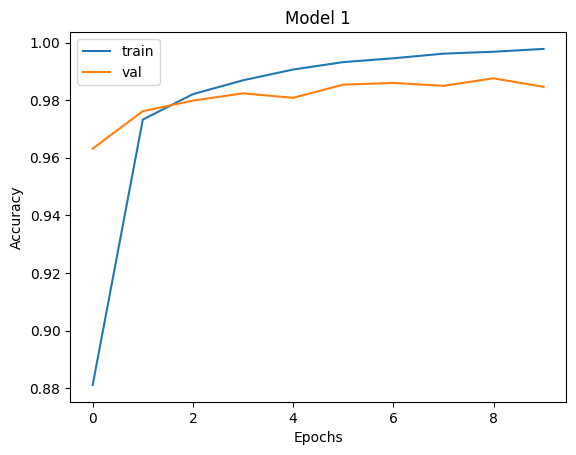

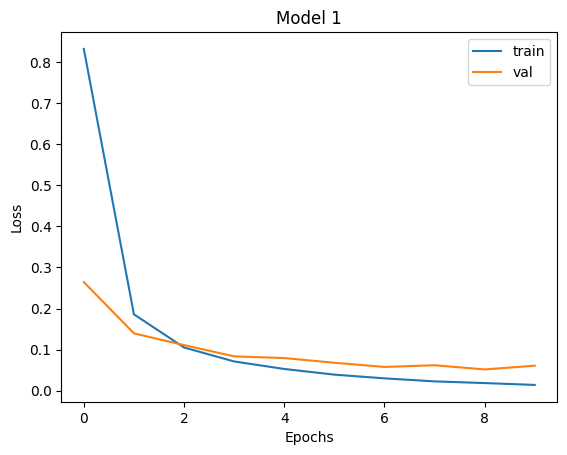

In [11]:
plot_two_lines_same_x(acc_train_all1, acc_val_all1, "Epochs", "Accuracy", "Model 1")
plot_two_lines_same_x(loss_train_all1, loss_val_all1, "Epochs", "Loss", "Model 1")

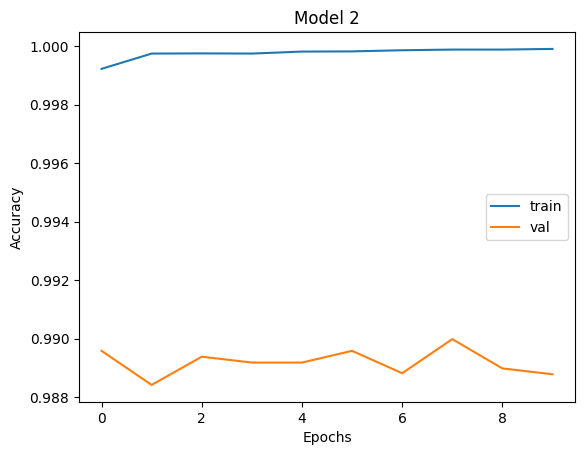

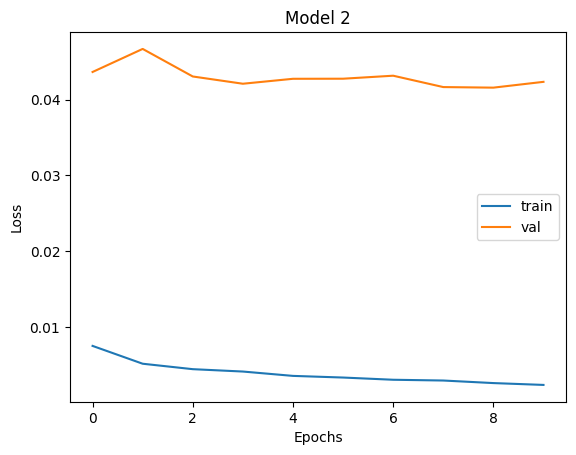

In [12]:
plot_two_lines_same_x(acc_train_all2, acc_val_all2, "Epochs", "Accuracy", "Model 2")
plot_two_lines_same_x(loss_train_all2, loss_val_all2, "Epochs", "Loss", "Model 2")

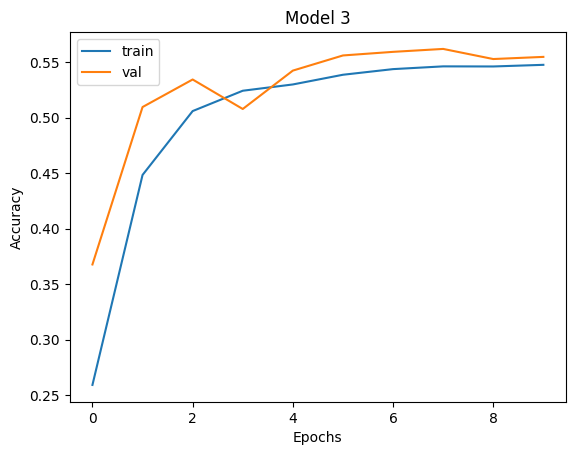

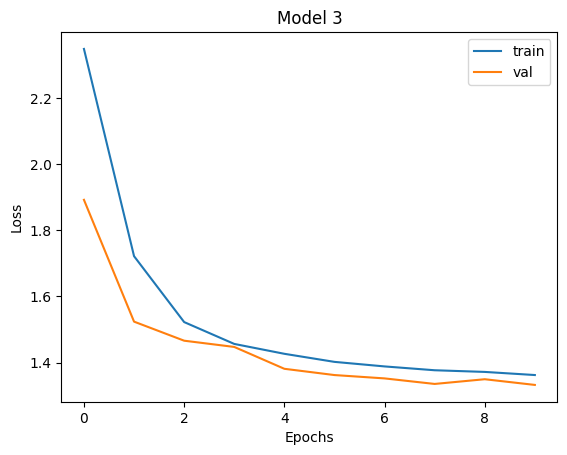

In [13]:
plot_two_lines_same_x(acc_train_all3, acc_val_all3, "Epochs", "Accuracy", "Model 3")
plot_two_lines_same_x(loss_train_all3, loss_val_all3, "Epochs", "Loss", "Model 3")

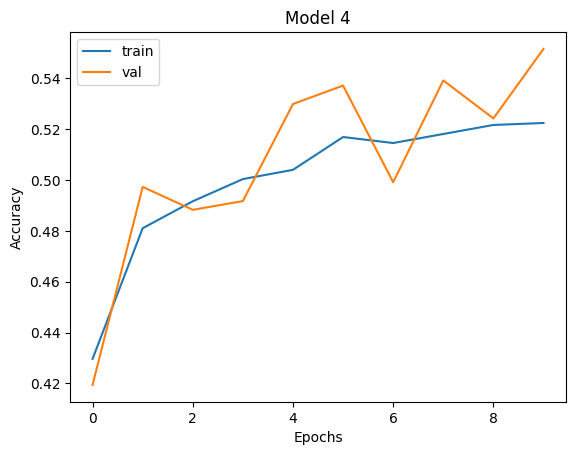

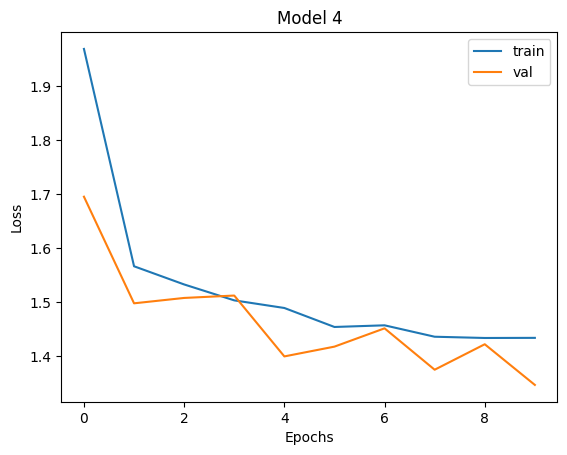

In [14]:
plot_two_lines_same_x(acc_train_all4, acc_val_all4, "Epochs", "Accuracy", "Model 4")
plot_two_lines_same_x(loss_train_all4, loss_val_all4, "Epochs", "Loss", "Model 4")

In [15]:
model_path1 = "./saved_models/PointNet-LR0.0001/model_10.pth"
model_path2 = "./saved_models/PointNet-LR0.00001/model_10.pth"
test_path = "./combined_asl_alphabet/Test_Alphabet"

actuals1, predicteds1, count1, failcount1, wrongs1, errored1 = predict_images(model_path1, test_path, "./misclassified")
actuals2, predicteds2, count2, failcount2, wrongs2, errored2 = predict_images(model_path2, test_path, "./misclassified")

Current sign:test_alphabet
Current sign:r
Current sign:u
Current sign:i
Current sign:n
Current sign:g
Current sign:z
Current sign:t
Current sign:s
Current sign:a
Current sign:f
Current sign:o
Current sign:h
Current sign:blank
Current sign:del
Current sign:space
Current sign:m
Current sign:j
Current sign:c
Current sign:d
Current sign:v
Current sign:q
Current sign:x
Current sign:e
Current sign:b
Current sign:k
Current sign:l
Current sign:y
Current sign:p
Current sign:w
Current sign:test_alphabet
Current sign:r
Current sign:u
Current sign:i
Current sign:n
Current sign:g
Current sign:z
Current sign:t
Current sign:s
Current sign:a
Current sign:f
Current sign:o
Current sign:h
Current sign:blank
Current sign:del
Current sign:space
Current sign:m
Current sign:j
Current sign:c
Current sign:d
Current sign:v
Current sign:q
Current sign:x
Current sign:e
Current sign:b
Current sign:k
Current sign:l
Current sign:y
Current sign:p
Current sign:w


In [16]:
print(errored1)
accuracy1 = calculate_accuracy(actuals1, predicteds1)
print(accuracy1)

[]
0.9892521271831617


In [17]:
print(errored2)
accuracy2 = calculate_accuracy(actuals2, predicteds2)
print(accuracy2)

[]
0.9919427036705462
